# Decoding Pokemon Types: Insights into Type Matchups and Battle Tactics

**Introduction:**
Welcome to "Decoding Pokemon Types: Insights into Type Matchups and Battle Tactics." In the vast world of Pokemon battles, understanding the intricate dynamics of type matchups is essential for trainers seeking victory. This notebook delves deep into the complexities of Pokemon types, offering valuable insights into how different types interact with one another on the battlefield. By decoding the mysteries of type matchups and exploring strategic battle tactics, trainers can elevate their skills and gain a competitive edge in their Pokemon journey. Join us on this exploration as we unravel the secrets behind Pokemon types and empower trainers to become masters of battle strategy.

Data Set:
* abilities: a stringified list of abilities that the pokémon is capable of having.
* against_?: eighteen features that denote the amount of damage taken against an attack of a particular type of pokémon.
* attack: the base attack of the pokémon.
* base_egg_steps: the number of steps required to hatch an egg of the pokémon.
* base_happiness: base happiness of the pokémon.
* base_total: sum of hp, attack, defense, sp_attack, sp_defense and speed.
* capture_rate: capture rate of the pokémon.
* classification: the classification of the pokémon as described by the Sun and Moon pokédex.
* defense: the base defense of the pokémon.
* experience_growth: the experience growth of the pokémon.
* height_m: height of the pokémon in metres.
* hp: the base HP of the pokemon. It is short for Hit Point, which determines how much damage a pokémon   can receive before fainting.
* japanese_name: the original Japanese name of the pokémon.
* name: the English name of the pokémon.
* percentage_male: the percentage of the species that are male. Blank if the pokémon is genderless.
* pokedex_number: the entry number of the pokémon in the National Pokédex.
* sp_attack: the base special attack of the pokémon.
* sp_defense: the base special defense of the pokémon.
* speed: the base speed of the pokémon.
* type1: the primary type of the pokémon.
* type2: the secondary type of the pokémon.
* weight_kg: the weight of the pokémon in kilograms.
* generation: the numbered generation which the pokémon was first introduced.
* is_legendary: denotes if the pokémon is legendary.

**Importing all required Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Loading the Data**

In [3]:
pokemon = pd.read_csv('/kaggle/input/pokemon/pokemon.csv')


In [4]:
# Let’s take a look at the top five rows using the DataFrame’s head() method
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [5]:
'''
The info() method is useful to get a quick description of the data, in
particular the total number of rows, each attribute’s type, and the number of nonnull values
data.info()
'''
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [6]:
#Check for Duplication
pokemon.nunique()

abilities            482
against_bug            5
against_dark           5
against_dragon         4
against_electric       6
against_fairy          5
against_fight          6
against_fire           5
against_flying         5
against_ghost          5
against_grass          5
against_ground         6
against_ice            5
against_normal         4
against_poison         6
against_psychic        6
against_rock           5
against_steel          5
against_water          5
attack               114
base_egg_steps        10
base_happiness         6
base_total           203
capture_rate          34
classfication        588
defense              109
experience_growth      6
height_m              51
hp                    99
japanese_name        801
name                 801
percentage_male        7
pokedex_number       801
sp_attack            111
sp_defense            97
speed                113
type1                 18
type2                 18
weight_kg            421
generation             7


In [7]:
#missing values calculation
pokemon.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [8]:
#percentage Calculation of missing Data
(pokemon.isnull().sum()/(len(pokemon)))*100

abilities             0.000000
against_bug           0.000000
against_dark          0.000000
against_dragon        0.000000
against_electric      0.000000
against_fairy         0.000000
against_fight         0.000000
against_fire          0.000000
against_flying        0.000000
against_ghost         0.000000
against_grass         0.000000
against_ground        0.000000
against_ice           0.000000
against_normal        0.000000
against_poison        0.000000
against_psychic       0.000000
against_rock          0.000000
against_steel         0.000000
against_water         0.000000
attack                0.000000
base_egg_steps        0.000000
base_happiness        0.000000
base_total            0.000000
capture_rate          0.000000
classfication         0.000000
defense               0.000000
experience_growth     0.000000
height_m              2.496879
hp                    0.000000
japanese_name         0.000000
name                  0.000000
percentage_male      12.234707
pokedex_

**Fixing DataTypes**
Capture rate` column is in object data type. Converting it into float data type

In [9]:
pokemon['capture_rate'].value_counts()

capture_rate
45                          250
190                          75
255                          69
75                           61
3                            58
120                          55
60                           50
90                           38
30                           20
200                          19
225                          15
25                           13
180                          11
50                            7
150                           7
235                           7
100                           6
140                           6
127                           5
70                            4
65                            3
125                           3
55                            3
170                           2
130                           2
15                            2
220                           2
80                            2
205                           1
155                           1
145                        

**There is row in `capture rate` column where capture rate is '30 (Meteorite)255 (Core)'. lets change it to the max value as 255.**

In [10]:
pokemon[pokemon.capture_rate == '30 (Meteorite)255 (Core)']['capture_rate']

773    30 (Meteorite)255 (Core)
Name: capture_rate, dtype: object

In [11]:
pokemon.loc[773,'capture_rate'] = 255
pokemon['capture_rate'] = pokemon['capture_rate'].apply(lambda x: float(x))
pokemon.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

**Different Types and their respective Frequency**
In this I have displayed the type1 and type2 based Pokemon and their frequency

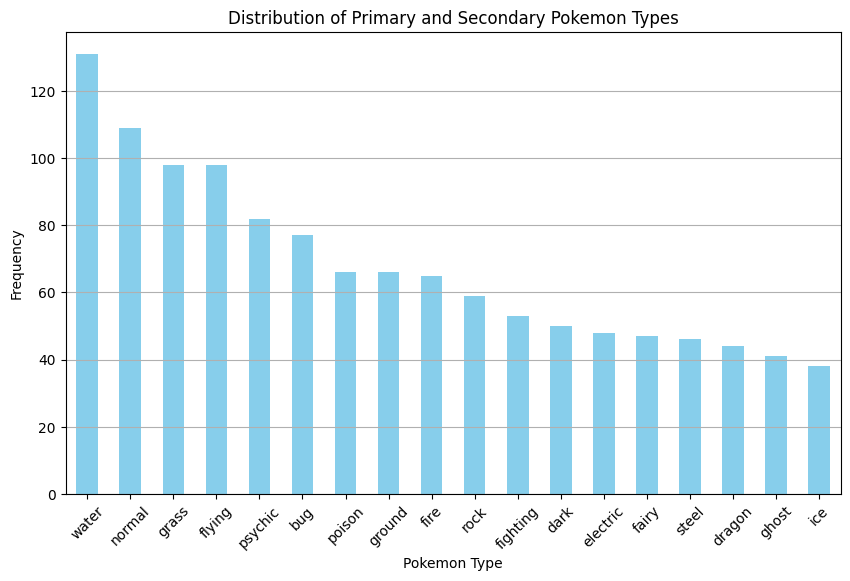

In [12]:
types_series = pd.concat([pokemon['type1'], pokemon['type2']], ignore_index=True)

# Count the frequency of each type
type_counts = types_series.value_counts()

# Plot the distribution of primary and secondary types
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Primary and Secondary Pokemon Types')
plt.xlabel('Pokemon Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

*The graph titled "Distribution of Primary and Secondary Pokémon Types" displays the frequency of each Pokémon type, considering both primary (type1) and secondary (type2) types from the dataset.

Each bar represents a Pokémon type, and the height of the bar corresponds to the frequency of that type in the dataset. The x-axis shows the Pokémon types, while the y-axis represents the frequency of occurrence.

From the graph, you can observe the distribution of Pokémon types across the dataset. It provides insights into which types are more common and which are less common among the Pokémon species analyzed. The graph helps visualize the diversity and prevalence of different Pokémon types within the dataset.

The bars are colored in sky blue for better visibility, and the plot is accompanied by grid lines along the y-axis to aid in reading the frequency values. Additionally, the x-axis labels (Pokemon Type) are rotated by 45 degrees for better readability, especially when there are many types listed.

Overall, this visualization helps in understanding the distribution and prevalence of Pokémon types, contributing to the exploratory analysis of the dataset.*

In [13]:
pokemon.name.value_counts()

name
Bulbasaur    1
Sawk         1
Drilbur      1
Excadrill    1
Audino       1
            ..
Lombre       1
Ludicolo     1
Seedot       1
Nuzleaf      1
Magearna     1
Name: count, Length: 801, dtype: int64

**** Visualizing the special attack and special defense stats of Pokemon can help identify Pokemon with strong offensive or defensive capabilities**

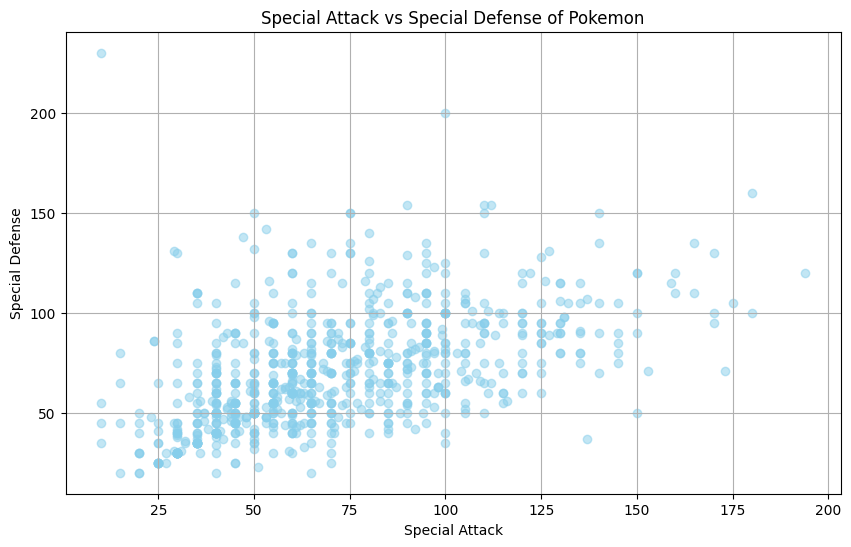

In [14]:
sp_attack = pokemon['sp_attack']
sp_defense = pokemon['sp_defense']

# Plot scatter plot of special attack vs special defense
plt.figure(figsize=(10, 6))
plt.scatter(sp_attack, sp_defense, color='skyblue', alpha=0.5)
plt.title('Special Attack vs Special Defense of Pokemon')
plt.xlabel('Special Attack')
plt.ylabel('Special Defense')
plt.grid(True)
plt.show()

*The scatter plot titled "Special Attack vs Special Defense of Pokémon" illustrates the relationship between the special attack and special defense attributes of Pokémon species in the dataset.

Each point on the plot represents an individual Pokémon, with its special attack value on the x-axis and its special defense value on the y-axis. The position of each point indicates the specific combination of special attack and special defense for that Pokémon.

The plot is colored in sky blue, with an alpha value of 0.5 to provide transparency, allowing for better visualization of overlapping points. This transparency helps identify areas of higher density or concentration of data points.

The presence of a grid aids in reading and interpreting the values along both axes accurately. This grid allows for a quick assessment of the distribution of points and helps in identifying any patterns or trends in the data.

Overall, this scatter plot provides insights into how special attack and special defense attributes correlate or vary across different Pokémon species. It helps in understanding the relationship between these two attributes and can provide valuable information for strategic considerations in Pokémon battles.
*





**Generational Evolution:** Counting the distribution of Pokemon across different generations can provide insights into the evolution of the Pokemon universe over time.I have used plotly to represent the data.

In [15]:
import plotly.express as px



# Count the frequency of Pokemon introduced in each generation
generation_counts = pokemon['generation'].value_counts().sort_index()

# Create a DataFrame from the counts
generation_df = pd.DataFrame({'Generation': generation_counts.index, 'Frequency': generation_counts.values})

# Create an interactive bar plot using Plotly
fig = px.bar(generation_df, x='Generation', y='Frequency', title='Distribution of Pokemon Across Generations',
             labels={'Frequency': 'Number of Pokemon', 'Generation': 'Generation'})
fig.show()

*The interactive bar plot titled "Distribution of Pokémon Across Generations" visualizes the frequency of Pokémon introduced in each generation.

Each bar in the plot represents a Pokémon generation, with the x-axis indicating the generation number and the y-axis representing the number of Pokémon introduced in that generation.

Users can interact with the plot by hovering over each bar to view the exact number of Pokémon for a specific generation. Additionally, users can pan, zoom, and reset the view for better exploration of the data.

This interactive visualization provides a dynamic and engaging way to explore the distribution of Pokémon across different generations. It allows users to quickly grasp the relative size of each generation and compare the number of Pokémon introduced in each.*

**Displaying only those Pokemon that are legendary**

In [16]:
# Filter the dataset to include only legendary Pokemon
legendary_pokemon = pokemon[pokemon['is_legendary'] == 1]

# Display the names of legendary Pokemon
legendary_names = legendary_pokemon['name']
print(legendary_names)

143      Articuno
144        Zapdos
145       Moltres
149        Mewtwo
150           Mew
          ...    
796    Celesteela
797       Kartana
798      Guzzlord
799      Necrozma
800      Magearna
Name: name, Length: 70, dtype: object


**Creating a new CSV file to save the data of only legendary Pokemons**

In [17]:
output_csv_file = 'legendary_pokemon.csv'

# Write the filtered DataFrame to a new CSV file
legendary_pokemon.to_csv(output_csv_file, index=False)

print(f"Legendary Pokemon information has been saved to '{output_csv_file}'.")

Legendary Pokemon information has been saved to 'legendary_pokemon.csv'.


**Displaying the data of legendary pokemons**

In [18]:
legendary_pokemon_df = pd.read_csv('legendary_pokemon.csv')

# Display the DataFrame
legendary_pokemon_df.head(70)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Pressure', 'Snow Cloak']",0.50,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,...,NaN,144,95,125,85,ice,flying,55.4,1,1
1,"['Pressure', 'Static']",0.50,1.0,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,NaN,145,125,90,100,electric,flying,52.6,1,1
2,"['Pressure', 'Flame Body']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,NaN,146,125,85,90,fire,flying,60.0,1,1
3,"['Pressure', 'Unnerve']",2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,150,194,120,140,psychic,NaN,122.0,1,1
4,['Synchronize'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,151,100,100,100,psychic,NaN,4.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
66,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
67,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
68,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


****Adjusting the name column in the first row ****

In [19]:
legendary_pokemon_df = legendary_pokemon_df[['name'] + [col for col in legendary_pokemon_df.columns if col != 'name']]

# Write the reordered DataFrame back to a new CSV file
legendary_pokemon_df.to_csv('legendary_pokemon_reordered.csv', index=False)

print("CSV file with reordered columns has been saved.")

CSV file with reordered columns has been saved.


In [20]:
# Display the DataFrame
legendary_pokemon_df.head(70)

,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,Articuno,"['Pressure', 'Snow Cloak']",0.50,1.0,1.0,2.0,1.0,1.0,2.0,1.0,...,NaN,144,95,125,85,ice,flying,55.4,1,1
1,Zapdos,"['Pressure', 'Static']",0.50,1.0,1.0,1.0,1.0,0.5,1.0,0.5,...,NaN,145,125,90,100,electric,flying,52.6,1,1
2,Moltres,"['Pressure', 'Flame Body']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,...,NaN,146,125,85,90,fire,flying,60.0,1,1
3,Mewtwo,"['Pressure', 'Unnerve']",2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,...,NaN,150,194,120,140,psychic,NaN,122.0,1,1
4,Mew,['Synchronize'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,...,NaN,151,100,100,100,psychic,NaN,4.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Celesteela,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,...,NaN,797,107,101,61,steel,flying,999.9,7,1
66,Kartana,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
67,Guzzlord,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
68,Necrozma,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [21]:

# Group the legendary Pokémon by their abilities
pokemon_groups = legendary_pokemon.groupby('abilities')

# Initialize a variable to store the total number of data
total_data = 0

# Iterate over the groups and print the Pokémon with identical abilities
for ability, group in pokemon_groups:
    if len(group) > 1:
        print(f"Pokémon with identical abilities '{ability}':")
        print(group[['name', 'abilities']])
        print()
        total_data += len(group)  # Increment the total number of data

# Display the total number of data
print(f"Total number of data: {total_data}")

Pokémon with identical abilities '['Beast Boost']':
           name        abilities
792    Nihilego  ['Beast Boost']
793    Buzzwole  ['Beast Boost']
794   Pheromosa  ['Beast Boost']
795   Xurkitree  ['Beast Boost']
796  Celesteela  ['Beast Boost']
797     Kartana  ['Beast Boost']
798    Guzzlord  ['Beast Boost']

Pokémon with identical abilities '['Justified']':
          name      abilities
637   Cobalion  ['Justified']
638  Terrakion  ['Justified']
639   Virizion  ['Justified']
646     Keldeo  ['Justified']

Pokémon with identical abilities '['Levitate']':
          name     abilities
379     Latias  ['Levitate']
380     Latios  ['Levitate']
479       Uxie  ['Levitate']
480    Mesprit  ['Levitate']
481      Azelf  ['Levitate']
487  Cresselia  ['Levitate']

Pokémon with identical abilities '['Pressure', 'Inner Focus']':
        name                    abilities
242   Raikou  ['Pressure', 'Inner Focus']
243    Entei  ['Pressure', 'Inner Focus']
244  Suicune  ['Pressure', 'Inner Focus

**Displaying those pokemons which have highest hit point against fire**

In [22]:

attack_type = 'against_fire'  

# Find the minimum value in the "against_fire" column for the specified attack type
min_value =legendary_pokemon_df[attack_type].min()

# Filter the DataFrame to include only Pokémon with the minimum value in the "against_fire" column
pokemon_with_min_damage = pokemon[pokemon[attack_type] == min_value]

# Print the names of all Pokémon with the minimum damage against the specified attack type
print("Pokémon that can take the minimum damage against", attack_type)
print(pokemon_with_min_damage[['name', attack_type]])

Pokémon that can take the minimum damage against against_fire
           name  against_fire
137     Omanyte          0.25
138     Omastar          0.25
139      Kabuto          0.25
140    Kabutops          0.25
218    Magcargo          0.25
221     Corsola          0.25
229     Kingdra          0.25
368   Relicanth          0.25
483      Palkia          0.25
563    Tirtouga          0.25
564  Carracosta          0.25
642    Reshiram          0.25
687     Binacle          0.25
688  Barbaracle          0.25
695      Tyrunt          0.25
696   Tyrantrum          0.25
720   Volcanion          0.25
775  Turtonator          0.25


**Type Matchup Analysis:** Exploring the effectiveness of Pokémon types against each other (e.g., which types are strong against which types) to understand type matchups and strategic considerations in battles

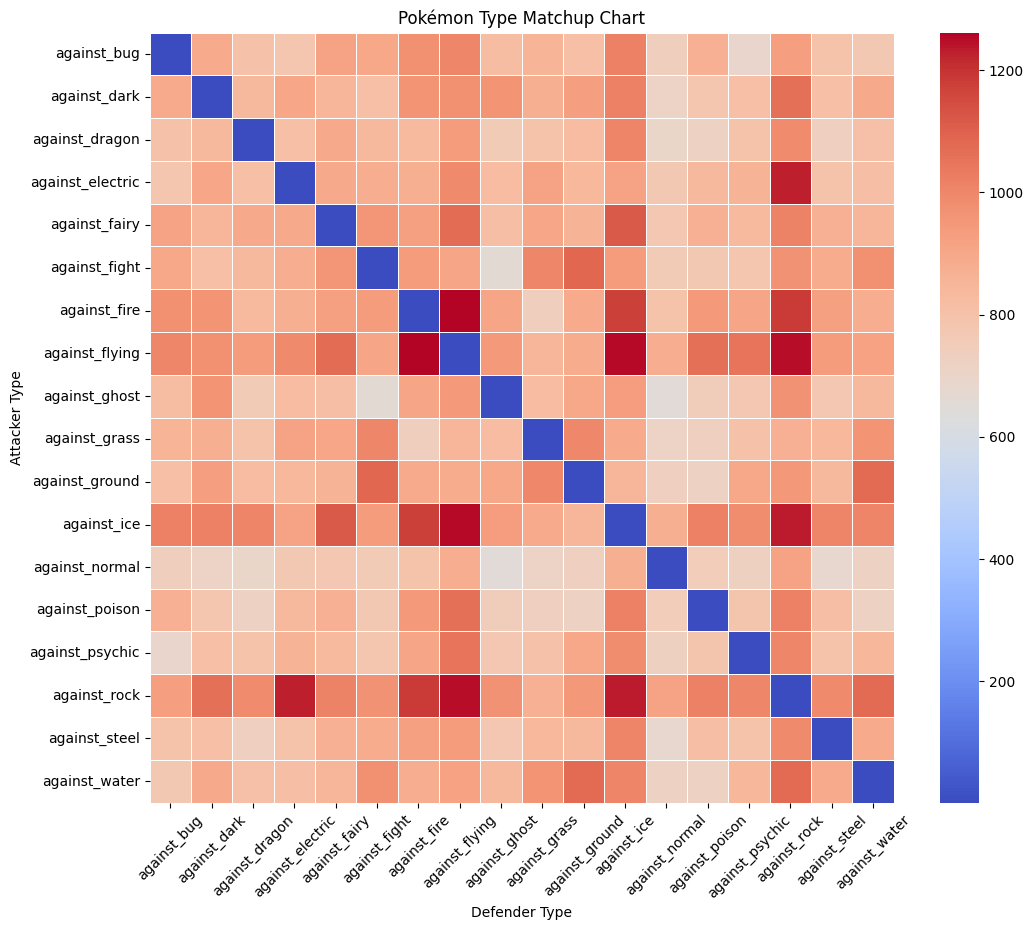

In [23]:

type_columns = ['against_bug', 'against_dark', 'against_dragon', 'against_electric', 
                'against_fairy', 'against_fight', 'against_fire', 'against_flying', 
                'against_ghost', 'against_grass', 'against_ground', 'against_ice', 
                'against_normal', 'against_poison', 'against_psychic', 'against_rock', 
                'against_steel', 'against_water']

# Initialize an empty DataFrame to store the matchup strengths
matchup_df = pd.DataFrame(index=type_columns, columns=type_columns)

for attacker_type in type_columns:
    for defender_type in type_columns:
         if attacker_type == defender_type:
            # If attacker and defender are of the same type, assign a neutral value
            matchup_df.loc[attacker_type, defender_type] = 1.0
         else:
            # Otherwise, calculate the matchup strength by summing the product of effectiveness values
            matchup_df.loc[attacker_type, defender_type] = sum(pokemon[attacker_type] * pokemon[defender_type])

            
            
# Create a heatmap to visualize the type matchup chart
plt.figure(figsize=(12, 10))
sns.heatmap(matchup_df.astype(float), cmap='coolwarm', linewidths=0.5)
plt.title('Pokémon Type Matchup Chart')
plt.xlabel('Defender Type')
plt.ylabel('Attacker Type')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

*The heatmap titled "Pokémon Type Matchup Chart" visualizes the effectiveness of Pokémon types against each other in battles.

The x-axis represents the defender types, while the y-axis represents the attacker types. Each cell in the heatmap indicates the matchup strength between the attacker and defender types. The color intensity within each cell reflects the strength of the matchup, with warmer colors indicating stronger matchups and cooler colors indicating weaker matchups.

The matchups are calculated based on the effectiveness values of different Pokémon types against each other. A value of 1.0 signifies a neutral matchup, where the attacker and defender are of the same type. Values above 1.0 indicate that the attacker has an advantage over the defender, while values below 1.0 indicate that the defender has an advantage over the attacker.

This visualization helps Pokémon trainers understand the strategic considerations and type advantages/disadvantages when planning battles or assembling a team. It provides valuable insights into which types are strong against others and can inform decision-making during Pokémon battles.*

**The heatmap provides a visual representation of the Pokémon Type Matchup Chart, with rows and columns representing different Pokémon types and color intensity representing matchup strengths.**

** Key Findings**
1. Understanding Type Matchups: Explain the concept of type matchups in Pokémon battles, highlighting how certain types are strong against others while being weak against some.
2. Type Chart Analysis: Provide an analysis of the Pokémon type chart, showcasing the strengths and weaknesses of each type against others. Highlight notable advantages and disadvantages of specific type combinations.
3. Strategic Considerations: Discuss strategic considerations for trainers when building their teams and selecting moves based on type matchups. Emphasize the importance of balancing team composition to cover weaknesses and exploit opponent vulnerabilities.
4. Common Type Combinations: Identify common type combinations used in competitive battles and analyze their effectiveness. Discuss popular strategies and synergies that arise from specific type combinations.
5. Continuous Learning: Emphasize the importance of continuous learning and experimentation in mastering Pokémon battles. Encourage trainers to explore new strategies, analyze battle outcomes, and adapt their approach accordingly.

**Refrences**

Gonçalves,J.(2023).Discovering the Best Pokémon.In Kaggle.
https://www.kaggle.com/code/joaopdrg/discovering-the-best-pok-mon